In [61]:
## uncomment these if you upload this on google drive and mount the drive
from google.colab import drive
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


#### Q1. Loading Data 

Run the below cell to load CIFAR-10 train and test data. 
Answer the corresponding questions in the overleaf document

In [62]:
## Define transforms to apply on images
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

## defining training and test data
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

print(train_data.data.shape[0])
print(test_data.data.shape[0])

\
## creating data loaders
batch_size = 4 ## set the batch size value 
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)

print(len(train_loader.dataset))
print(len(test_loader.dataset))

## image labels in cifar 10
class_labels = classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
50000
10000
50000
10000


### Helper function 
To display images in the training set

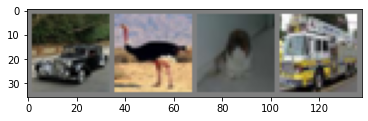

  car  bird   dog truck


In [63]:
# function to display images in the training set 
def display(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


## displaying images in 1 batch of the training set

# get 1 batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
display(torchvision.utils.make_grid(images[0:4]))
# print labels
print(' '.join('%5s' % class_labels[labels[j]] for j in range(4)))


### Q2. Classifier Architecture 

In [64]:
## Defining Classifier architecture 

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### Q3. Training the network

(i) Training on CPU 

In [65]:
### Complete the code in the training box 

## for reproducibility
torch.manual_seed(7)
np.random.seed(7)

## Instantiating classifier
net = Net()

## Defining optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


## Defining Training Parameters

num_epochs = 3 # 2 for CPU training, 10 for GPU training
running_loss_list = [] # list to store running loss in the code below 
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #===============================================#
        optimizer.zero_grad() # zero the parameter gradients
        outputs = net(inputs) # forward + backward + optimize
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        #===============================================#
        # print statistics
        running_loss += loss.cpu().item()
        if i % 250 == 249:    # print every 250 mini-batches
            print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
            running_loss_list.append(running_loss)
            running_loss = 0.0
            
print('Training Complete')
PATH = './net.pth'
torch.save(net.state_dict(), PATH)

[1, 250] loss: 2.303
[1, 500] loss: 2.301
[1, 750] loss: 2.296
[1, 1000] loss: 2.292
[1, 1250] loss: 2.267
[1, 1500] loss: 2.215
[1, 1750] loss: 2.086
[1, 2000] loss: 2.025
[1, 2250] loss: 1.970
[1, 2500] loss: 1.961
[1, 2750] loss: 1.890
[1, 3000] loss: 1.797
[1, 3250] loss: 1.842
[1, 3500] loss: 1.772
[1, 3750] loss: 1.769
[1, 4000] loss: 1.700
[1, 4250] loss: 1.695
[1, 4500] loss: 1.711
[1, 4750] loss: 1.697
[1, 5000] loss: 1.698
[1, 5250] loss: 1.642
[1, 5500] loss: 1.643
[1, 5750] loss: 1.674
[1, 6000] loss: 1.629
[1, 6250] loss: 1.583
[1, 6500] loss: 1.555
[1, 6750] loss: 1.581
[1, 7000] loss: 1.526
[1, 7250] loss: 1.553
[1, 7500] loss: 1.559
[1, 7750] loss: 1.549
[1, 8000] loss: 1.553
[1, 8250] loss: 1.487
[1, 8500] loss: 1.513
[1, 8750] loss: 1.540
[1, 9000] loss: 1.535
[1, 9250] loss: 1.508
[1, 9500] loss: 1.488
[1, 9750] loss: 1.542
[1, 10000] loss: 1.489
[1, 10250] loss: 1.406
[1, 10500] loss: 1.520
[1, 10750] loss: 1.460
[1, 11000] loss: 1.458
[1, 11250] loss: 1.485
[1, 115

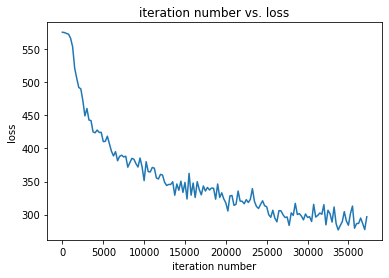

In [66]:
## complete the code to plot the running loss per 250 mini batches curve
def plot_loss_curve(running_loss_list):
    x_range = np.arange(1, len(running_loss_list)*250, 250)
    plt.xlabel("iteration number")
    plt.ylabel("loss")
    plt.title("iteration number vs. loss")
    plt.plot(x_range, np.array(running_loss_list))
    plt.show()

plot_loss_curve(running_loss_list)

(ii) Paste the above code in the code block below and modify it to use GPUs for training 


In [67]:
### Complete the code in the training box 

## for reproducibility
torch.manual_seed(7)
np.random.seed(7)

## Instantiating classifier
net = Net().cuda()
## Defining optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


## Defining Training Parameters

num_epochs = 20 # 2 for CPU training, 10 for GPU training
running_loss_list = [] # list to store running loss in the code below 
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #===============================================#
        # Fill in the training loop here.
        optimizer.zero_grad() # zero the parameter gradients
        outputs = net(inputs.cuda()) # forward + backward + optimize
        loss = criterion(outputs.cuda(), labels.cuda())
        loss.backward()
        optimizer.step()
        #===============================================#
        # print statistics
        running_loss += loss.cuda().item()
        if i % 250 == 249:    # print every 250 mini-batches
            print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
            running_loss_list.append(running_loss)
            running_loss = 0.0
            
print('Training Complete')
PATH = './net.pth'
torch.save(net.state_dict(), PATH)

[1, 250] loss: 2.303
[1, 500] loss: 2.301
[1, 750] loss: 2.296
[1, 1000] loss: 2.292
[1, 1250] loss: 2.267
[1, 1500] loss: 2.215
[1, 1750] loss: 2.085
[1, 2000] loss: 2.025
[1, 2250] loss: 1.969
[1, 2500] loss: 1.961
[1, 2750] loss: 1.890
[1, 3000] loss: 1.798
[1, 3250] loss: 1.842
[1, 3500] loss: 1.772
[1, 3750] loss: 1.769
[1, 4000] loss: 1.699
[1, 4250] loss: 1.695
[1, 4500] loss: 1.712
[1, 4750] loss: 1.703
[1, 5000] loss: 1.700
[1, 5250] loss: 1.645
[1, 5500] loss: 1.644
[1, 5750] loss: 1.671
[1, 6000] loss: 1.630
[1, 6250] loss: 1.587
[1, 6500] loss: 1.556
[1, 6750] loss: 1.582
[1, 7000] loss: 1.525
[1, 7250] loss: 1.551
[1, 7500] loss: 1.557
[1, 7750] loss: 1.555
[1, 8000] loss: 1.552
[1, 8250] loss: 1.488
[1, 8500] loss: 1.515
[1, 8750] loss: 1.536
[1, 9000] loss: 1.535
[1, 9250] loss: 1.516
[1, 9500] loss: 1.497
[1, 9750] loss: 1.534
[1, 10000] loss: 1.483
[1, 10250] loss: 1.405
[1, 10500] loss: 1.516
[1, 10750] loss: 1.450
[1, 11000] loss: 1.459
[1, 11250] loss: 1.489
[1, 115

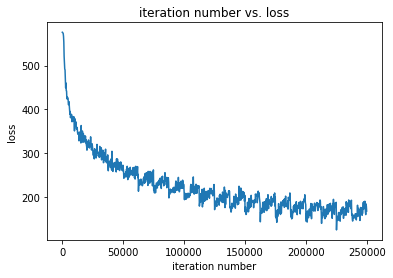

In [68]:
plot_loss_curve(running_loss_list)

### Testing the network

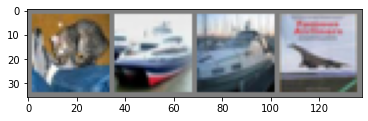

GroundTruth:	   cat	 ship	 ship	plane
Predicted:	   cat	 ship	 ship	 ship


In [69]:
## displaying images from test set 
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
display(torchvision.utils.make_grid(images[0:4]))
print('GroundTruth:\t', '\t'.join('%5s' % class_labels[labels[j]] for j in range(4)))

## Instantiating network and loading the trained model
net = Net()
net.load_state_dict(torch.load(PATH))

## Getting predicted label/class from the model output 
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted:\t', '\t'.join('%5s' % class_labels[predicted[j]] for j in range(4)))

(iv) Complete the code below to test the network on the entire testing set. 

In [70]:
### Accuracy on whole data set
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
acc  = correct / total * 100 ## stores the accuracy computed in the above loop 
print('Accuracy of the network on the 10000 test images: %d %%' % (acc))

Accuracy of the network on the 10000 test images: 60 %


(v) Convert the training code in part (iii) and testing code in part (iv) to define functions `train` and  `test` with function definitions as shown below. Train the network with different batch size and number of epochs. Use the `plot_loss_curve` function you defined in (i) above to plot the loss curves. Use the defined `train` and `test` functions to train the network for various configurations asked in (v) in the problem set. 

In [71]:
def train(train_loader=train_loader, num_epochs=2, use_gpu=False, lr=0.001, momentum=0.9, model_save_path='./net.pth'):
    """
    INPUTS 
    num_epochs: number of training epochs
    use_gpu: False by default. If true, load the model and data to GPU for training
    lr: learning rate for SGD optimizer
    momentum: momentum for SGD optimizer
    model_save_path: save path for the trained model 

    OUTPUTS
    returns running_loss_list: which stores the loss averaged over a minibatch of size 250
    """
    
    if use_gpu == True:
        net = Net().cuda()
    else:
        net = Net()
    
    criterion = nn.CrossEntropyLoss()

    optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)
    num_epochs = num_epochs
    running_loss_list = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            #===============================================#
            optimizer.zero_grad() # zero the parameter gradients
            if use_gpu:
                outputs = net(inputs.cuda()) # forward + backward + optimize
                loss = criterion(outputs.cuda(), labels.cuda())
            else:
                optimizer.zero_grad() # zero the parameter gradients
                outputs = net(inputs) # forward + backward + optimize
            loss.backward()
            optimizer.step()
            #===============================================#
            # print statistics
            if use_gpu == True:
                running_loss += loss.cuda().item()
            else:
                running_loss += loss.cpu().item()
            if i % 250 == 249:    # print every 250 mini-batches
                print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
                running_loss_list.append(running_loss)
                running_loss = 0.0
    
    plot_loss_curve(running_loss_list)
    print('Training Complete')
    PATH = './net.pth'
    torch.save(net.state_dict(), PATH)
    ## complete the code. 
    return running_loss_list

    # plot
    plt.figure(figsize=(10,10))
    plt.xlabel("iteration number")
    plt.ylabel("loss")
    plt.title("iteration number vs. loss")
    plt.plot(running_loss_list)
    savefig(model_save_path, format='png', bbox_inches='tight')

    return running_loss_list

def test(test_loader=test_loader, model_path='./net.pth'):
    net = Net()
    net.load_state_dict(torch.load(model_path))
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc  = correct / total * 100 ## stores the accuracy computed in the above loop 
    print('Accuracy of the network on the 10000 test images: %d %%' % (acc))

Batch Size: 4, Epochs: 20
[1, 250] loss: 2.304
[1, 500] loss: 2.304
[1, 750] loss: 2.303
[1, 1000] loss: 2.302
[1, 1250] loss: 2.297
[1, 1500] loss: 2.294
[1, 1750] loss: 2.271
[1, 2000] loss: 2.208
[1, 2250] loss: 2.112
[1, 2500] loss: 2.040
[1, 2750] loss: 1.950
[1, 3000] loss: 1.941
[1, 3250] loss: 1.899
[1, 3500] loss: 1.894
[1, 3750] loss: 1.791
[1, 4000] loss: 1.822
[1, 4250] loss: 1.772
[1, 4500] loss: 1.717
[1, 4750] loss: 1.701
[1, 5000] loss: 1.723
[1, 5250] loss: 1.661
[1, 5500] loss: 1.672
[1, 5750] loss: 1.624
[1, 6000] loss: 1.600
[1, 6250] loss: 1.678
[1, 6500] loss: 1.637
[1, 6750] loss: 1.613
[1, 7000] loss: 1.584
[1, 7250] loss: 1.587
[1, 7500] loss: 1.604
[1, 7750] loss: 1.551
[1, 8000] loss: 1.559
[1, 8250] loss: 1.554
[1, 8500] loss: 1.533
[1, 8750] loss: 1.504
[1, 9000] loss: 1.514
[1, 9250] loss: 1.520
[1, 9500] loss: 1.476
[1, 9750] loss: 1.461
[1, 10000] loss: 1.559
[1, 10250] loss: 1.508
[1, 10500] loss: 1.528
[1, 10750] loss: 1.483
[1, 11000] loss: 1.464
[1, 

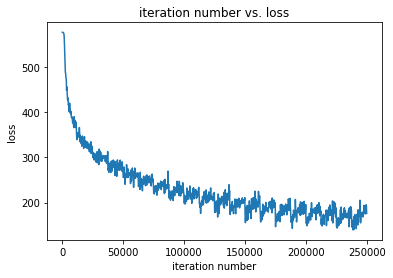

Training Complete
Accuracy of the network on the 10000 test images: 61 %


In [72]:
batch_size = 4
training_epochs = 20
print(f"Batch Size: {batch_size}, Epochs: {training_epochs}")
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
train(train_loader=train_loader, num_epochs=training_epochs, use_gpu=True, lr=0.001, momentum=0.9, model_save_path='./net.pth')
test(test_loader=test_loader, model_path='./net.pth')

Batch Size: 4, Epochs: 5
[1, 250] loss: 2.307
[1, 500] loss: 2.303
[1, 750] loss: 2.295
[1, 1000] loss: 2.289
[1, 1250] loss: 2.268
[1, 1500] loss: 2.195
[1, 1750] loss: 2.099
[1, 2000] loss: 2.016
[1, 2250] loss: 1.969
[1, 2500] loss: 1.954
[1, 2750] loss: 1.904
[1, 3000] loss: 1.891
[1, 3250] loss: 1.811
[1, 3500] loss: 1.820
[1, 3750] loss: 1.782
[1, 4000] loss: 1.793
[1, 4250] loss: 1.777
[1, 4500] loss: 1.762
[1, 4750] loss: 1.739
[1, 5000] loss: 1.745
[1, 5250] loss: 1.660
[1, 5500] loss: 1.664
[1, 5750] loss: 1.622
[1, 6000] loss: 1.622
[1, 6250] loss: 1.659
[1, 6500] loss: 1.644
[1, 6750] loss: 1.613
[1, 7000] loss: 1.595
[1, 7250] loss: 1.591
[1, 7500] loss: 1.613
[1, 7750] loss: 1.560
[1, 8000] loss: 1.583
[1, 8250] loss: 1.567
[1, 8500] loss: 1.545
[1, 8750] loss: 1.557
[1, 9000] loss: 1.461
[1, 9250] loss: 1.548
[1, 9500] loss: 1.552
[1, 9750] loss: 1.531
[1, 10000] loss: 1.513
[1, 10250] loss: 1.479
[1, 10500] loss: 1.531
[1, 10750] loss: 1.472
[1, 11000] loss: 1.488
[1, 1

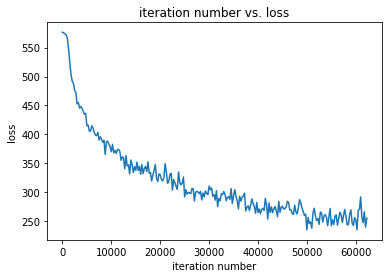

Training Complete
Accuracy of the network on the 10000 test images: 62 %


In [73]:
batch_size = 4
training_epochs = 5
print(f"Batch Size: {batch_size}, Epochs: {training_epochs}")
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
train(train_loader=train_loader, num_epochs=training_epochs, use_gpu=True, lr=0.001, momentum=0.9, model_save_path='./net.pth')
test(test_loader=test_loader, model_path='./net.pth')

Batch Size: 16, Epochs: 5
[1, 250] loss: 2.303
[1, 500] loss: 2.299
[1, 750] loss: 2.287
[1, 1000] loss: 2.249
[1, 1250] loss: 2.150
[1, 1500] loss: 2.053
[1, 1750] loss: 1.972
[1, 2000] loss: 1.898
[1, 2250] loss: 1.825
[1, 2500] loss: 1.801
[1, 2750] loss: 1.748
[1, 3000] loss: 1.700
[2, 250] loss: 1.632
[2, 500] loss: 1.620
[2, 750] loss: 1.635
[2, 1000] loss: 1.578
[2, 1250] loss: 1.577
[2, 1500] loss: 1.573
[2, 1750] loss: 1.558
[2, 2000] loss: 1.558
[2, 2250] loss: 1.492
[2, 2500] loss: 1.523
[2, 2750] loss: 1.524
[2, 3000] loss: 1.502
[3, 250] loss: 1.466
[3, 500] loss: 1.471
[3, 750] loss: 1.456
[3, 1000] loss: 1.405
[3, 1250] loss: 1.439
[3, 1500] loss: 1.417
[3, 1750] loss: 1.399
[3, 2000] loss: 1.411
[3, 2250] loss: 1.406
[3, 2500] loss: 1.374
[3, 2750] loss: 1.370
[3, 3000] loss: 1.332
[4, 250] loss: 1.333
[4, 500] loss: 1.320
[4, 750] loss: 1.310
[4, 1000] loss: 1.307
[4, 1250] loss: 1.289
[4, 1500] loss: 1.291
[4, 1750] loss: 1.308
[4, 2000] loss: 1.313
[4, 2250] loss: 1.

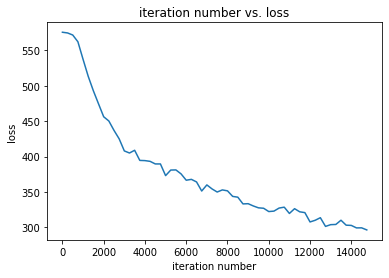

Training Complete
Accuracy of the network on the 10000 test images: 56 %


In [74]:
batch_size = 16
training_epochs = 5
print(f"Batch Size: {batch_size}, Epochs: {training_epochs}")
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
train(train_loader=train_loader, num_epochs=training_epochs, use_gpu=True, lr=0.001, momentum=0.9, model_save_path='./net.pth')
test(test_loader=test_loader, model_path='./net.pth')

Batch Size: 16, Epochs: 20
[1, 250] loss: 2.303
[1, 500] loss: 2.301
[1, 750] loss: 2.298
[1, 1000] loss: 2.284
[1, 1250] loss: 2.228
[1, 1500] loss: 2.132
[1, 1750] loss: 2.052
[1, 2000] loss: 1.959
[1, 2250] loss: 1.917
[1, 2500] loss: 1.868
[1, 2750] loss: 1.822
[1, 3000] loss: 1.784
[2, 250] loss: 1.704
[2, 500] loss: 1.684
[2, 750] loss: 1.638
[2, 1000] loss: 1.631
[2, 1250] loss: 1.573
[2, 1500] loss: 1.579
[2, 1750] loss: 1.552
[2, 2000] loss: 1.533
[2, 2250] loss: 1.515
[2, 2500] loss: 1.518
[2, 2750] loss: 1.497
[2, 3000] loss: 1.449
[3, 250] loss: 1.434
[3, 500] loss: 1.447
[3, 750] loss: 1.442
[3, 1000] loss: 1.431
[3, 1250] loss: 1.438
[3, 1500] loss: 1.388
[3, 1750] loss: 1.368
[3, 2000] loss: 1.391
[3, 2250] loss: 1.377
[3, 2500] loss: 1.377
[3, 2750] loss: 1.353
[3, 3000] loss: 1.348
[4, 250] loss: 1.320
[4, 500] loss: 1.319
[4, 750] loss: 1.346
[4, 1000] loss: 1.324
[4, 1250] loss: 1.337
[4, 1500] loss: 1.300
[4, 1750] loss: 1.291
[4, 2000] loss: 1.308
[4, 2250] loss: 1

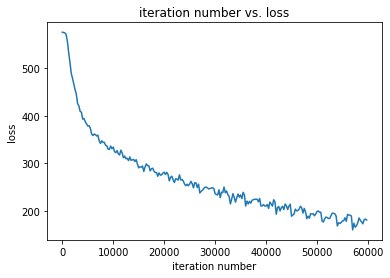

Training Complete
Accuracy of the network on the 10000 test images: 63 %


In [75]:
batch_size = 16
training_epochs = 20
print(f"Batch Size: {batch_size}, Epochs: {training_epochs}")
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
train(train_loader=train_loader, num_epochs=training_epochs, use_gpu=True, lr=0.001, momentum=0.9, model_save_path='./net.pth')
test(test_loader=test_loader, model_path='./net.pth')